## Project Overview 

### Project - Predicting Customer Churn using ML
Customers churn occurs when customers or subscribers stop business with a company.
Businesses are very keen on measuring churn because keeping an existing customers is far less expensive than acquiring a new customer. New  business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals

Preventing customer churn is critically important to the Telecommunications sector, as the barriers to entry for switching services are so low.

### Context 
Analysis of Telecom company customer database, with information about the attributes of its customers. The intention customers with greater potential to leave company.

### Content 
Each row represents a customer, each column contains customers attributes described on the column Metadata.

### The dataset includes information about :
* Customers who left within the last month- the column is called Churn
* Service that each customer has signed up for --- phone, multiple lines, online backup, online security, device protection, tech support, and streaming TV, and movies.
* Customer account information - how long they've been a customer, contact, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers- gender, age , range, and they have partners and dependents

# Data Preparation

In [53]:
# Install some package
#! pip install pandas_profiling

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import pandas_profiling
%matplotlib inline

In [3]:
url = 'Dataset/Customer-Churn.csv'

In [4]:
# perform Exploratory Data Analysis in just one line of code
pandas_profiling.ProfileReport(pd.read_csv(url))

# Data Exploration

In [5]:
# import Customer Churn Dataset 
df = pd.read_csv(url)

In [22]:
df.head(622)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617,5240-CAOYT,Female,0,No,No,57,Yes,Yes,Fiber optic,Yes,...,No,Yes,No,No,Month-to-month,Yes,Bank transfer (automatic),87.55,4884.85,No
618,4059-IIEBK,Female,0,No,No,7,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),78.55,522.95,No
619,4881-JVQOD,Male,1,Yes,Yes,10,No,No phone service,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),34.55,362.60,No
620,0516-UXRMT,Female,0,No,No,62,Yes,Yes,Fiber optic,Yes,...,Yes,No,No,No,One year,Yes,Electronic check,92.05,5755.80,No


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Here can see that Total Charges is an object variable. Let's change it to float

In [8]:
# Repace all the spaces with null values
df['TotalCharges'] = df['TotalCharges'].replace(" ",np.nan)

# Drop null values of 'Total Charges' feature
df = df[df['TotalCharges'].notnull()]
df =df.reset_index()[df.columns]

# Convert 'Total Charges' column values to float data type
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [10]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [11]:
#  Group one categorical column by another column and return a DataFrame
def group_count(label0='Loyal Customer', label1='Churner', col1='Churn', col2='Churn', cond=None):
    
    # Return a DataFrame with the count of col2 and col1 as index
    if cond is None:
        df_group = df[col2].groupby(df[col1]).count().to_frame()
    else:
        df_group = df['ChurnLab'][cond].groupby(df[col1]).count().to_frame()
        
    # Let's rename the only column in the Dataframe
    df_group.columns = ['Count_Churn']

    # Let's add a percent column, too
    df_group['percent_Churn'] = df_group['Count_Churn']/sum(df_group['Count_Churn'])

    # The second column is the same as the first, by default. When this is the case:
    if col1 == col2:
        # Let's reset the index to the set of first n integers, just in case
        df_group.reset_index(inplace=True)
        # We drop the column that holds the same values as the index
        df_group.drop(columns=[col1], inplace=True)

    # We need to use the label names as indexes, so we rename the indexes
    df_group.rename(index={0: label0, 1: label1}, inplace=True)
    return df_group

In [12]:
churned = group_count()
churned

,Count_Churn,percent_Churn
Loyal Customer,5163,0.734215
Churner,1869,0.265785


As we can see, more than 26% of company's population have churned.

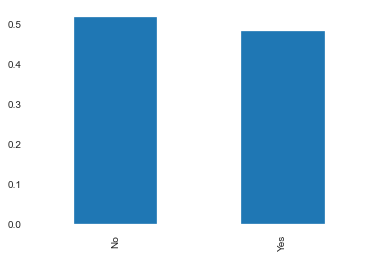

In [13]:
df.Partner.value_counts(normalize=True).plot(kind='bar')

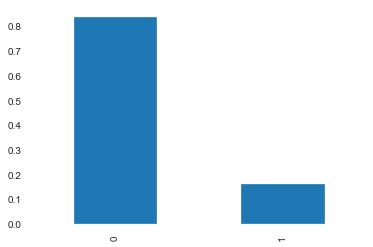

In [14]:
df.SeniorCitizen.value_counts(normalize=True).plot(kind='bar')

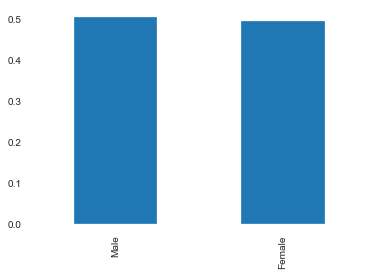

In [15]:
df.gender.value_counts(normalize=True).plot(kind='bar')

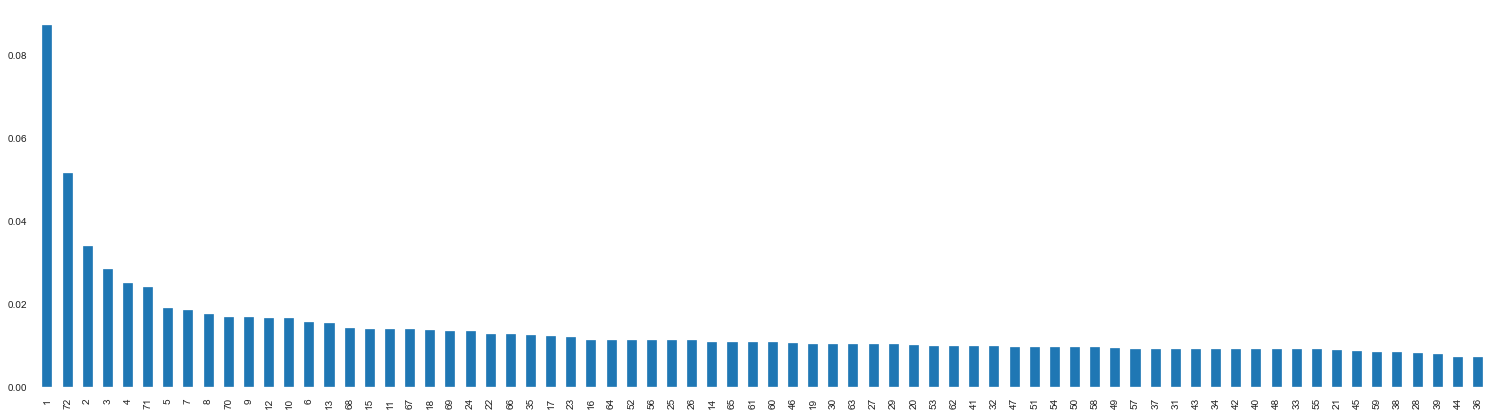

In [16]:
df.tenure.value_counts(normalize=True).plot(kind='bar',figsize=(26,7))

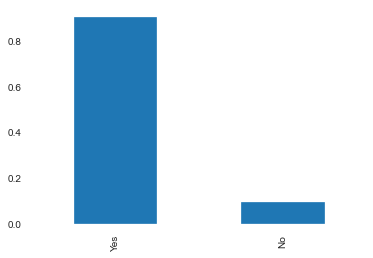

In [17]:
df.PhoneService.value_counts(normalize=True).plot(kind='bar')

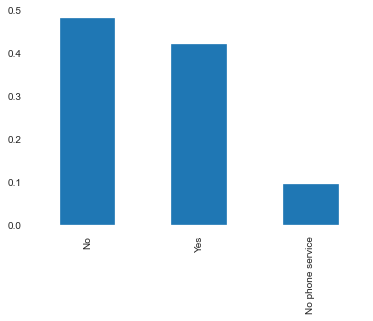

In [18]:
df.MultipleLines.value_counts(normalize=True).plot(kind='bar')

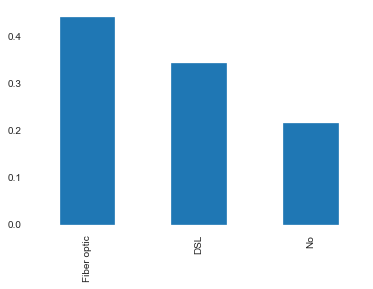

In [19]:
df.InternetService.value_counts(normalize=True).plot(kind='bar')

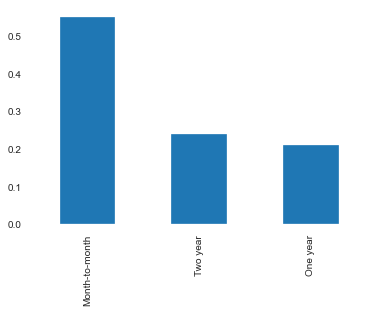

In [20]:
df.Contract.value_counts(normalize=True).plot(kind='bar')

In [21]:
df.Churn.groupby['SeniorCitizen'].head

TypeError: 'method' object is not subscriptable

### We will visualize others variables as we will perform our analysis.

### Now let Plot variables with respect our target variable.

In [ ]:
# First let see our target variable.
df.Churn.value_counts(normalize=True).plot(kind='bar')

In [ ]:
# Now let's start comparing
# Gender vs Churn
print (pd.crosstab(df.gender, df.Churn, margins=True))
pd.crosstab(df.gender, df.Churn, margins=True).plot(kind='bar', figsize=(7,5))

In [ ]:
print(' Percent of females that left the company  {0}'.format((939/1869)*100))
print(' Percent of males that left the company  {0}'.format((930/1869)*100))

### We can see that gender does'nt play an important role in predicting our target variable.

In [ ]:
# Contact vs Churn
print (pd.crosstab(df.Contract, df.Churn, margins=True))
pd.crosstab(df.Contract, df.Churn, margins=True).plot(kind='bar', figsize=(7,5))

In [ ]:
print(' Percent of Month-to-Month Contract that left the company  {0}'.format((1655 /1869)*100))
print(' Percent of one-year that left the company  {0}'.format((166 /1869)*100))
print(' Percent of two-years that left the company  {0}'.format((48/1869)*100))

### Most of the people that left were the Ones who had Month-to-Month Contract 

In [ ]:
# Internet Service vs Churn
print (pd.crosstab(df.InternetService, df.Churn, margins=True))
pd.crosstab(df.InternetService, df.Churn, margins=True).plot(kind='bar', figsize=(7,5))

In [ ]:
print(' Percent of DSL InternetService that left the company  {0}'.format((459 /1869)*100))
print(' Percent of Fiber Optic InternetService that left the company {0}'.format((1297 /1869)*100))
print(' Percent of No InternetService that left the company  {0}'.format((113/1869)*100))

### Most of the people that left had Fiber Optic Internet-Service.

In [ ]:
# Tenure Median vs Churn
print (pd.crosstab(df.tenure.median(), df.Churn, margins=True))
pd.crosstab(df.tenure.median(), df.Churn, margins=True).plot(kind='bar', figsize=(7,5))

Dependents    No   Yes   All
Partner                     
No          3280   359  3639
Yes         1653  1740  3393
All         4933  2099  7032


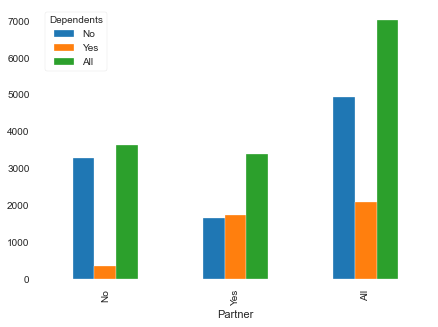

In [85]:
# Partner vs Dependents
print (pd.crosstab(df.Partner, df.Dependents, margins=True))
pd.crosstab(df.Partner, df.Dependents, margins=True).plot(kind='bar', figsize=(7,5))

In [86]:
print(' Percent of Partner that had Dependents  {0}'.format((1749 /2110)*100))
print(' Percent of Non-Partner that had Dependents  {0}'.format((361 /2110)*100))

 Percent of Partner that had Dependents  82.8909952606635
 Percent of Non-Partner that had Dependents  17.10900473933649


### We can see Partners had much larger percent of Dependents than Non-Partner this tells us that most Partners might be married.

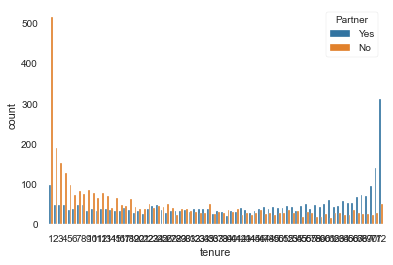

In [87]:
sns.countplot(x=df['tenure'], hue=df.Partner);

### Most of people that were Partner will stay longer with the company. So being a Partner is a plus-point for the company as they will stay with them

Churn      No   Yes   All
Partner                  
No       2439  1200  3639
Yes      2724   669  3393
All      5163  1869  7032


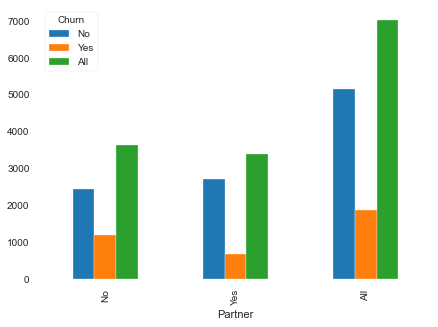

In [88]:
# Partner vs Churn
print (pd.crosstab(df.Partner, df.Churn, margins=True))
pd.crosstab(df.Partner, df.Churn, margins=True).plot(kind='bar', figsize=(7,5))

Churn            No   Yes   All
SeniorCitizen                  
0              4497  1393  5890
1               666   476  1142
All            5163  1869  7032


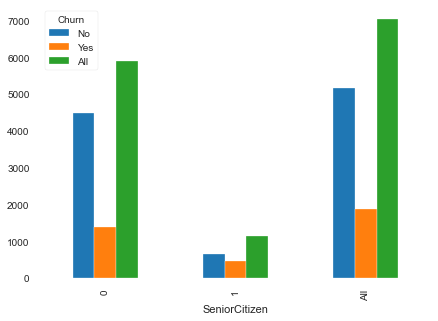

In [89]:
# SeniorCitizen vs Churn
print (pd.crosstab(df.SeniorCitizen, df.Churn, margins=True))
pd.crosstab(df.SeniorCitizen, df.Churn, margins=True).plot(kind='bar', figsize=(7,5))

In [58]:
df[['Churn','SeniorCitizen']].groupby(['Churn']).head()

,Churn,SeniorCitizen
0,No,0
1,No,0
2,Yes,0
3,No,0
4,Yes,0
5,Yes,0
6,No,0
7,No,0
8,Yes,0
13,Yes,0


In [51]:
df[['Churn','MonthlyCharges']].groupby(['Churn']).MonthlyCharges.sum().to_frame()

,MonthlyCharges
Churn,
No,316530.15
Yes,139130.85


In [52]:
df[['Churn','MonthlyCharges']].groupby(['Churn']).MonthlyCharges.sum().to_frame()/df['MonthlyCharges'].sum()

,MonthlyCharges
Churn,
No,0.694661
Yes,0.305339


In [53]:
df[['Churn','TotalCharges']].groupby(['Churn']).TotalCharges.sum().to_frame()

,TotalCharges
Churn,
No,13193241.8
Yes,2862926.9


In [55]:
df[['Churn','TotalCharges']].groupby(['Churn']).TotalCharges.sum().to_frame()/df['TotalCharges'].sum()

,TotalCharges
Churn,
No,0.821693
Yes,0.178307


### Let's check for outliers in Monthly Charges and Total Charges using Box plots.

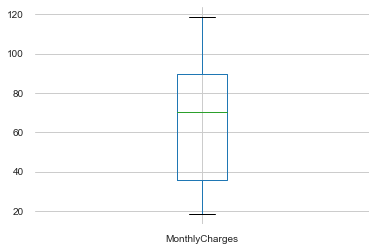

In [90]:
df.boxplot('MonthlyCharges')

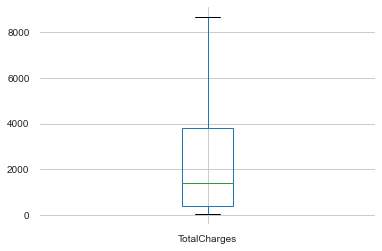

In [91]:
df.boxplot('TotalCharges')

### Both, Monthly Charges and Total Charges don't have any outliers, so, we don't have to get into extracting information from outliers

In [92]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


### Correlation Matrix

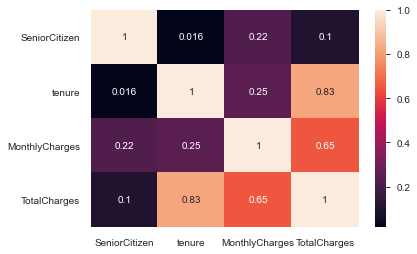

In [93]:
# Let's check for the Correlation Matrix in seaborn
sns.heatmap(df.corr(),xticklabels=df.corr().columns.values,yticklabels=df.corr().columns.values, annot=True)

In [94]:
 df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


* We can see tenure and Total Charge are correlate and also Monthly Charges and Total Charges are also correlate each other. So this is proving our first Hypothesis right of considering Total Charges = Monthly Charges * tenure  + Additional Tax that we had taken above.


## Data Munging Process 

In [95]:
# Checking for Null
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### We can see here that we have 11 Null values in Total Charges so let's o fill them...

In [96]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [97]:
fill = df.MonthlyCharges * df.tenure

In [98]:
df.TotalCharges.fillna(fill,inplace=True)

In [99]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### No Nul values are there now

## When Churn ="Yes"

In [100]:
df.loc[(df.Churn== 'Yes'), 'MonthlyCharges'].median()

79.65

In [101]:
df.loc[(df.Churn== 'Yes'), 'TotalCharges'].median()

703.55

In [102]:
df.loc[(df.Churn== 'Yes'), 'tenure'].median()

10.0

In [103]:
df.loc[(df.Churn== 'Yes'), 'PaymentMethod'].value_counts(normalize = True)

Electronic check             0.573034
Mailed check                 0.164794
Bank transfer (automatic)    0.138042
Credit card (automatic)      0.124131
Name: PaymentMethod, dtype: float64

### Most of the people that left are the ones who had Payment Method as Electronic check, so let's make a separate variable for it so that the model can easily predict our target variable.

In [104]:
df['Is_Electronic_check']= np.where(df['PaymentMethod'])=='Electronic check'

In [105]:
df.loc[(df.Churn== 'Yes'), 'PaperlessBilling'].value_counts(normalize = True)

Yes    0.749064
No     0.250936
Name: PaperlessBilling, dtype: float64

In [106]:
df.loc[(df.Churn== 'Yes'), 'DeviceProtection'].value_counts(normalize = True)

No                     0.64794
Yes                    0.29160
No internet service    0.06046
Name: DeviceProtection, dtype: float64

In [107]:
df.loc[(df.Churn== 'Yes'), 'OnlineBackup'].value_counts(normalize = True)

No                     0.659711
Yes                    0.279829
No internet service    0.060460
Name: OnlineBackup, dtype: float64

In [108]:
df.loc[(df.Churn== 'Yes'), 'TechSupport'].value_counts(normalize = True)

No                     0.773676
Yes                    0.165864
No internet service    0.060460
Name: TechSupport, dtype: float64

In [109]:
df.loc[(df.Churn== 'Yes'), 'OnlineSecurity'].value_counts(normalize = True)

No                     0.781701
Yes                    0.157838
No internet service    0.060460
Name: OnlineSecurity, dtype: float64

### We can see that people that left the company didn't use Services like Online Security, Device Protection, Tech Support and Online Backup quite often. Hence for our Prediction these variables will not be much importance. We will drop them in the end.

In [110]:
df = pd.get_dummies(df,columns=['Partner','Dependents',
                                'PhoneService','MultipleLines',
                                'StreamingTV','StreamingMovies',
                                'Contract','PaperlessBilling',
                                'InternetService'],drop_first=True)


 ### We have encoded the categorical variables with numeric using get dummies property which will make it easy for the machine to make Correct Prediction.

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customerID                           7032 non-null   object 
 1   gender                               7032 non-null   object 
 2   SeniorCitizen                        7032 non-null   int64  
 3   tenure                               7032 non-null   int64  
 4   OnlineSecurity                       7032 non-null   object 
 5   OnlineBackup                         7032 non-null   object 
 6   DeviceProtection                     7032 non-null   object 
 7   TechSupport                          7032 non-null   object 
 8   PaymentMethod                        7032 non-null   object 
 9   MonthlyCharges                       7032 non-null   float64
 10  TotalCharges                         7032 non-null   float64
 11  Churn                         

In [112]:
# Perform features  Scaling and one hot encoding 
from sklearn.preprocessing import StandardScaler

# Perform feature scaling on tenure, MonthlyCharges, Total Charges, in order to bring them on same scale 
standardScaler = StandardScaler()
columns_for_ft_scaling = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Apply the feature scaling operation on dataset using fit_transform() method
df[columns_for_ft_scaling] = standardScaler.fit_transform(df[columns_for_ft_scaling])

### Now let's drop the variables that are not important for us according to our analysis

In [113]:
df.drop(['StreamingMovies_No internet service','StreamingTV_No internet service'],axis=1, inplace=True)

In [114]:
df.drop('gender', axis=1, inplace=True)

In [115]:
df.drop(['tenure','MonthlyCharges'],axis=1, inplace=True)

In [116]:
df.drop(['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','PaymentMethod'],axis=1, inplace=True)

* Let's convert our target variable "Churn" for Yes or No to 1 or 0

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customerID                      7032 non-null   object 
 1   SeniorCitizen                   7032 non-null   int64  
 2   TotalCharges                    7032 non-null   float64
 3   Churn                           7032 non-null   object 
 4   Is_Electronic_check             7032 non-null   bool   
 5   Partner_Yes                     7032 non-null   uint8  
 6   Dependents_Yes                  7032 non-null   uint8  
 7   PhoneService_Yes                7032 non-null   uint8  
 8   MultipleLines_No phone service  7032 non-null   uint8  
 9   MultipleLines_Yes               7032 non-null   uint8  
 10  StreamingTV_Yes                 7032 non-null   uint8  
 11  StreamingMovies_Yes             7032 non-null   uint8  
 12  Contract_One year               70

### Now we have only 16 varaibles that we think are important for our prediction. So let's start our modelling part.

In [118]:
# Convert String values ( Yes and No) of Churn column to 1 and 0
df.loc[df.Churn=='No','Churn']= 0
df.loc[df.Churn=='Yes','Churn']= 1

In [119]:
df.Churn =df.Churn.astype('bool')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customerID                      7032 non-null   object 
 1   SeniorCitizen                   7032 non-null   int64  
 2   TotalCharges                    7032 non-null   float64
 3   Churn                           7032 non-null   bool   
 4   Is_Electronic_check             7032 non-null   bool   
 5   Partner_Yes                     7032 non-null   uint8  
 6   Dependents_Yes                  7032 non-null   uint8  
 7   PhoneService_Yes                7032 non-null   uint8  
 8   MultipleLines_No phone service  7032 non-null   uint8  
 9   MultipleLines_Yes               7032 non-null   uint8  
 10  StreamingTV_Yes                 7032 non-null   uint8  
 11  StreamingMovies_Yes             7032 non-null   uint8  
 12  Contract_One year               70

In [120]:
df.head()

,customerID,SeniorCitizen,TotalCharges,Churn,Is_Electronic_check,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,0,-0.994194,False,False,1,0,0,1,0,0,0,0,0,1,0,0
1,5575-GNVDE,0,-0.173740,False,False,0,0,1,0,0,0,0,1,0,0,0,0
2,3668-QPYBK,0,-0.959649,True,False,0,0,1,0,0,0,0,0,0,1,0,0
3,7795-CFOCW,0,-0.195248,False,False,0,0,0,1,0,0,0,1,0,0,0,0
4,9237-HQITU,0,-0.940457,True,False,0,0,1,0,0,0,0,0,0,1,1,0


# Modelling Part 

In [121]:
# Create feature variables x and target variable y
X = df.drop(['Churn','customerID'], axis=1)
y = df['Churn']

In [122]:
# train test split 
#Split the data into training set (70%) and test set(30%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 50)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4922, 15) (4922,)
(2110, 15) (2110,)


### Let's start with Logistic Regression Model because we know our Target variable has binary outcome.

In [123]:
# Machine learnig clasification model libraries
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [124]:
 # Fit the Logistic Regression Model
logmodel = LogisticRegression(random_state = 50)
logmodel.fit(X_train, y_train)

# predict the value for new, unseen data
pred = logmodel.predict(X_test)
#Find Accuracy using accuracy_score method 
logmodel_accuracy = round(metrics.accuracy_score(y_test, pred)* 100, 2)

In [125]:
# Fit the support Vector Machine Model
svcmodel = SVC(kernel = 'linear',random_state = 50, probability =True)
svcmodel.fit(X_train, y_train)

# Predict the value for new unseen data
svc_pred = svcmodel.predict(X_test)


#Find Accuracy using accuracy_score method 
svc_accuracy = round(metrics.accuracy_score(y_test, pred)* 100, 2)

In [126]:
# Fit the K-Nearest Neighbors Model
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier(n_neighbors=5, metric ='minkowski', p=2) #p=2 represents Euclidian distance
knnmodel.fit(X_train, y_train)


# Predict the value for new unseen data
knn_pred = knnmodel.predict(X_test)


#Find Accuracy using accuracy_score method 
knn_accuracy = round(metrics.accuracy_score(y_test, pred)* 100, 2)

In [127]:
# Fit the Decision Tree Classification Model
from sklearn.tree import DecisionTreeClassifier
dtmodel = DecisionTreeClassifier(criterion = 'gini', random_state = 50)
dtmodel.fit(X_train, y_train)


# Predict the value for new unseen data
dt_pred = dtmodel.predict(X_test)


#Find Accuracy using accuracy_score method 
dt_accuracy = round(metrics.accuracy_score(y_test, pred)* 100, 2)

In [128]:
# Fit the Decision Tree Classification Model
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier(criterion = 'entropy', random_state = 50)
rfmodel.fit(X_train, y_train)

  
# Predict the value for new unseen data
rf_pred = rfmodel.predict(X_test)


#Find Accuracy using accuracy_score method 
rf_accuracy = round(metrics.accuracy_score(y_test, pred)* 100, 2)

In [129]:
# Compare several models according to their Accuracies 
Model_Comparison =pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machine', 'K-Nearest Neighbors',
             'Decision Tree', 'Random Forest'],
    'Score': [logmodel_accuracy, svc_accuracy, knn_accuracy, dt_accuracy, rf_accuracy ]})
Model_Comparison_df = Model_Comparison.sort_values(by= 'Score', ascending = False)
Model_Comparison_df = Model_Comparison.set_index('Score')
Model_Comparison_df.reset_index()

,Score,Model
0,79.91,Logistic Regression
1,79.91,Support Vector Machine
2,79.91,K-Nearest Neighbors
3,79.91,Decision Tree
4,79.91,Random Forest


In [130]:
# Generate  Confusion Matrix for logistics regression model as it has maximum accuracy
from sklearn.metrics import confusion_matrix
conf_mat_logmodel = confusion_matrix(y_test, pred)
conf_mat_logmodel 

array([[1395,  166],
       [ 258,  291]], dtype=int64)

In [131]:
# Predict the probability of Churn of each customer 
df['Probability_of_Churn'] = logmodel.predict_proba(df[X_test.columns])[:,1]

In [132]:
# Create a Dataframe showcasing probability of Churn of each customer
df[['customerID','Probability_of_Churn']].head(15)

,customerID,Probability_of_Churn
0,7590-VHVEG,0.402667
1,5575-GNVDE,0.062546
2,3668-QPYBK,0.351959
3,7795-CFOCW,0.081756
4,9237-HQITU,0.626622
5,9305-CDSKC,0.784992
6,1452-KIOVK,0.579886
7,6713-OKOMC,0.300425
8,7892-POOKP,0.596614
9,6388-TABGU,0.030536


### BONUS : How long will it take for the company to lose all its customers?

Let $n$ be the number of months it will take for the company to lose all its customers. Let $N$ be the size of the dataset and $p$ the proportion of Total Churn observed for the month. To answer this question, we have to assume that $p$ and $N$ remain fixed during all future periods. Then, we can determine a function of $n$ given $N$ and $p$, say $P(n)$, such that $P(n)=0$. Said function is the population of customers at any time $n$ following the current month. For the current month, $n=0$.

Let's start empirically. We have $N=$`len(df)`$=7043$ and $p=26.54$%=0.2654.

+ At month $k=0 : P(0) = 7043-7043*0.2654 = 5173.7878 = 7043*[(1-0.2654)] = 7043*[(1-0.2654)]^1$
+ At month $k=1$ : $P(1) = 5173.7878-5173.7878*0.2654 = 5173.7878*(1-0.25) = 3800.66451788 = P(0)*[(1-0.2654)] = 7043*[(1-0.2654)]*(1-0.2654) = 7043*(1-0.2654)^2$ 
+ At month $k=2$ : $P(2) = 3800.66451788-3800.66451788*0.2654 = 3800.66451788*(1-0.2654) = 2791.968154834648‬ = P(1)*[(1-0.2654)] = 7043*(1-0.2654)^2 * (1-0.2654) = 7043*(1-0.2654)^3$ 
+ ...
+ At month $k=n$ : $P(n) = N*(1-p)$^$[n+1]$

Now we just have to solve the equation $P(n)=0$ in order to find $n$. But since we are facing an exponential function, we can never reach zero unless we approach +infinity. 

In reality, having a null population of customers is possible but having the expression of this population $P(n)=0$ is impossible, because the company won't last an infinity of months. So, conceptually, we only need to be as near zero as possible. And this is realized as soon as $P(n)<1$. Which makes sense, because we can't have any number of customers lesser than 1!

$P(n) < 1 <=> ln(N*(1-p)$^$[n+1]) < 0 <=> ln(N) + n*ln(1-p) + ln(1-p) < 0 <=> n*ln(1-p) < -[ln(N) + ln(1-p)]$ (*)

We now need to divide both sides by $ln(1-p)$, which is negative because $0 < (1-p) < 1$, so we change the inequality's direction so that (*) become:

$n > -[1+ (ln(N)/ln(1-p))]$

So, we just need to take the value noted above after said value has been rounded to its nearest integer, to which we add $1$, and here we have the corresponding value of $n$: $n = $`round(-[1+(np.log(N)/np.log(1-p))], 0) + 1`

In [28]:
n=round(-(1+(np.log(len(df))/np.log(1-0.2654))), 0) + 1
print('The company will lose all its customers after {} years and {} months'\
      .format(round(n/12), round(12*np.modf(n/12)[0])))

The company will lose all its customers after 2.0 years and 5.0 months


Let's check to see if we are right, with $n0 = 28$ months, $n= 29$ months and $n1 = 30$ months:

In [30]:
P_n0 = 7043*(1-.2654)**28
P_n = 7043*(1-.2654)**29
P_n1 = 7043*(1-.2654)**30
P_n0, P_n, P_n1

(1.2507875814186697, 0.9188285573101548, 0.6749714582000397)

Notice for $n0$, we still have one customer. From $n=29$, our number of customers is lesser than 1, we have no more customers. The rest is mathematical and makes sense with the reality: the number of customers is going closer and closer to zero (already zero in the reality) because we will still have no customers for any greater number of months given we still have the same monthly $p$-decrease and still haven't done anything to increase our $N$.

# Part 2

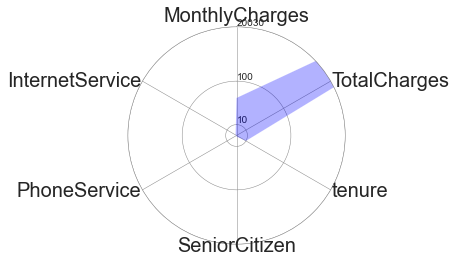

In [23]:
from math import pi
import matplotlib.pyplot as plt


# Set data
costumer1 = ['MonthlyCharges', 'TotalCharges', 'tenure', 'SeniorCitizen','PhoneService','InternetService']
values = [34.55,362.60,10,1,0,1]

N = len(costumer1)

x_as = [n / float(N) * 2 * pi for n in range(N)]

# Because our chart will be circular we need to append a copy of the first 
# value of each list at the end of each list with data
values += values[:1]
x_as += x_as[:1]


# Set color of axes
plt.rc('axes', linewidth=0.5, edgecolor="#888888")


# Create polar plot
ax = plt.subplot(111, polar=True)


# Set clockwise rotation. That is:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)


# Set position of y-labels
ax.set_rlabel_position(0)


# Set color and linestyle of grid
ax.xaxis.grid(True, color="#888888", linestyle='solid', linewidth=0.5)
ax.yaxis.grid(True, color="#888888", linestyle='solid', linewidth=0.5)


# Set number of radial axes and remove labels
plt.xticks(x_as[:-1], [])

# Set yticks
plt.yticks([10, 50, 100,200, 300], ["10", "100", "200" "30"])


# Plot data
ax.plot(x_as, values, linewidth=0, linestyle='solid', zorder=3)

# Fill area
ax.fill(x_as, values, 'b', alpha=0.3)


# Set axes limits
plt.ylim(0, 100)


# Draw ytick labels to make sure they fit properly
for i in range(N):
    angle_rad = i / float(N) * 2 * pi

    if angle_rad == 0:
        ha, distance_ax = "center", 10
    elif 0 < angle_rad < pi:
        ha, distance_ax = "left", 1
    elif angle_rad == pi:
        ha, distance_ax = "center", 1
    else:
        ha, distance_ax = "right", 1

    ax.text(angle_rad, 100 + distance_ax, costumer1[i], size=20, horizontalalignment=ha, verticalalignment="center")


# Show polar plot
plt.show()

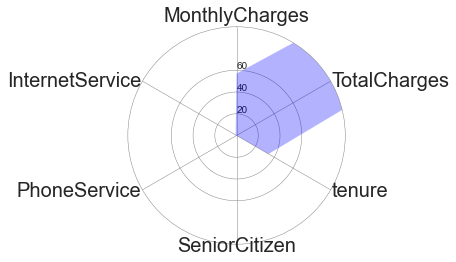

In [24]:
from math import pi
import matplotlib.pyplot as plt


# Set data
costumer2 = ['MonthlyCharges', 'TotalCharges', 'tenure','SeniorCitizen','PhoneService','InternetService']
values = [56.95,1889.50, 34,0,1,1]

N = len(costumer1)

x_as = [n / float(N) * 2 * pi for n in range(N)]

# Because our chart will be circular we need to append a copy of the first 
# value of each list at the end of each list with data
values += values[:1]
x_as += x_as[:1]


# Set color of axes
plt.rc('axes', linewidth=0.5, edgecolor="#888888")


# Create polar plot
ax = plt.subplot(111, polar=True)


# Set clockwise rotation. That is:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)


# Set position of y-labels
ax.set_rlabel_position(0)


# Set color and linestyle of grid
ax.xaxis.grid(True, color="#888888", linestyle='solid', linewidth=0.5)
ax.yaxis.grid(True, color="#888888", linestyle='solid', linewidth=0.5)


# Set number of radial axes and remove labels
plt.xticks(x_as[:-1], [])

# Set yticks
plt.yticks([20, 40, 60], ["20", "40", "60"])


# Plot data
ax.plot(x_as, values, linewidth=0, linestyle='solid', zorder=3)

# Fill area
ax.fill(x_as, values, 'b', alpha=0.3)


# Set axes limits
plt.ylim(0, 100)


# Draw ytick labels to make sure they fit properly
for i in range(N):
    angle_rad = i / float(N) * 2 * pi

    if angle_rad == 0:
        ha, distance_ax = "center", 10
    elif 0 < angle_rad < pi:
        ha, distance_ax = "left", 1
    elif angle_rad == pi:
        ha, distance_ax = "center", 1
    else:
        ha, distance_ax = "right", 1

    ax.text(angle_rad, 100 + distance_ax, costumer1[i], size=20, horizontalalignment=ha, verticalalignment="center")


# Show polar plot
plt.show()

#